# Tapered Line Impedance Transformer 
$$\Gamma (\theta) = \frac{1}{2} \int_{z=0}^L{e^{-2j \beta z} \frac{d}{dz} \ln{(\frac{Z(z)}{Z_o})}dz}$$  
  
$$\theta = \beta L = \frac {2 \pi}{\lambda} L = \frac { L }{c} \omega$$  

# Related information about DSP.
https://flothesof.github.io/FFT-window-properties-frequency-analysis.html?fbclid=IwAR0Z8H8XXi4qnT4H-N47oSronBXWdn7WDmD4zL4DfUfdxXv_w-2BuSben54
https://www.dsprelated.com/freebooks/sasp/Blackman_Harris_Window_Family.html
https://www.dsprelated.com/freebooks/sasp/Blackman_Harris_Window_Family.html
http://www.ece.northwestern.edu/local-apps/matlabhelp/toolbox/signal/blackmanharris.html

# Exponential Taper  
## Derivation of reflection coefficient of Exponential Taper
$$Z(z) = Z_o e^{az}$$  
  
$$\frac{d}{dz} \ln{(\frac{Z(z)}{Z_o})} =  \frac{d}{dz} \ln{(\frac{Z_o e^{az}}{Z_o})}$$ 
  
$$\frac{d}{dz} \ln{(\frac{Z(z)}{Z_o})} =  \frac{d}{dz} \ln{e^{az}}$$ 
  
$$\frac{d}{dz} \ln{(\frac{Z(z)}{Z_o})} =  \frac{d }{dz} {az} = a$$  
  
$$\Gamma (\theta) = \frac{1}{2} \int_{z=0}^L{e^{-2j \beta z} \frac{d}{dz} \ln{(\frac{Z(z)}{Z_o})}dz}$$  
  
$$\Gamma (\theta) = \frac{1}{2} \int_{z=0}^L{e^{-2j \beta z} a dz}$$  
  
$$\Gamma (\theta) = \frac{a}{2} \int_{z=0}^L{e^{-2j \beta z} dz}$$  
  
$$\Gamma (\theta) = \frac{a}{2} \int_{z=0}^L{e^{-2j \beta z} \frac{d (-2j \beta z)}{-2j \beta }}$$  
  
$$\Gamma (\theta) = \frac{a}{2} \frac {e^{-2j \beta z}}{-2j \beta }|_{z=0}^{z=L}$$  
  
$$\Gamma (\theta) = \frac{a}{2} \frac {e^{-2j \beta L}-1}{-2j \beta }$$  
  
$$\Gamma (\theta) = \frac{a}{2} \frac {1-e^{-2j \beta L}}{2j \beta }$$  
  
$$\Gamma (\theta) = \frac{a}{2}e^{-j \beta L} \frac {e^{j \beta L}-e^{-j \beta L}}{2j \beta }$$  
  
$$\Gamma (\theta) = \frac{a}{2}e^{-j \beta L} \frac {2 j \sin( \beta L)}{2j \beta }$$  
  
$$\Gamma (\theta) = \frac{a}{2}e^{-j \beta L} \frac {\sin( \beta L)}{ \beta }$$  
  
$$\Gamma (\theta) = \frac{a}{2}e^{-j \beta L} L\frac {\sin( \beta L)}{ \beta L }$$  
Since $$\beta = 0$$ is equvalent to 0Hz, $$\Gamma (0) = \frac{Z_L-Z_o}{Z_L+Z_o}$$  
$$L \frac{a}{2} = \frac{Z_L-Z_o}{Z_L+Z_o}$$  
$\ln x \simeq \frac{2(x - 1)}{x + 1} $ for $ x $ close to unity. Let $x=\frac{Z_L}{Z_o}$ then $a$ is obtained as following.
$$a = \frac{1}{L}\ln{\frac{Z_L}{Z_o}} $$

# Compare the equation for reflection coefficient to the equation for Fourier Transform.
$$\Gamma (2 \beta) = \frac{1}{2} \int_{z=0}^L{e^{-2j \beta z} \frac{d}{dz} \ln{(\frac{Z(z)}{Z_o})}dz}$$  
  
$$h(z) = \frac{\frac{d}{dz} \ln{(\frac{Z(z)}{Z_o})}}{2}$$  
  
$$\Gamma (2 \beta) =  \int_{z=0}^L{e^{-2j \beta z} h(z) dz}$$  
  
$$\omega = 2 \beta , \; t = z$$  
  
$$\Gamma (\omega) =  \int_{t=0}^L{e^{-j \omega t} h(t) dt}$$  
  
Comparing to Fourier Transform -  
$$H(\omega) = \int_{-\infty}^{\infty}{h(t) e^{-j \omega t}dt}$$
  
  


In [ ]:
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

In [ ]:
n = '100'

In [ ]:
zo = '50'

In [ ]:
zl = '100'

In [ ]:
n = int(n)
zo = int(zo)
zl = int(zl)

In [ ]:
# n = int(input('Number of section = ?'))
# zo = int(input('Zo = ?'))
# zl = int(input('ZL = ?'))

In [ ]:
#Let divide L into 100 pieces then use fft to find reflection coefficent.
# n = 100 #number of sections
# zo = 50
# zl = 100
gamma = (zl-zo)/(zl+zo)
print('reflection coefficient at 0Hz: ',gamma)
print('Approximation of reflection coefficient at 0Hz: ',np.log(zl/zo)/2)

reflection coefficient at 0Hz:  0.3333333333333333
Approximation of reflection coefficient at 0Hz:  0.34657359027997264


# TRY using FFT for Exponential Taper  
We got the similar result but the value at 0Hz is not correct.

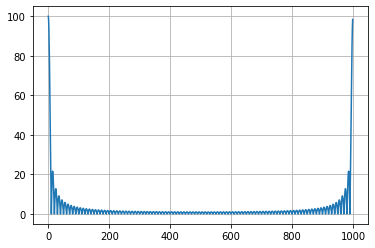

In [ ]:

#Let h(z) = 1
n = 100
#Exponential Taper: h(z) = 1 
h = np.ones(n)
#zero padding 10 เท่าเพื่อให้เห็น รายละเอียดของ ripple 
H = np.fft.fft(h,10*n)
plt.plot(np.abs(H))
plt.grid()
plt.show()
#ที่ 0Hz abs(H) = 1 เราต้องหาค่าคงที่มาปรับให้ได้เท่ากับ gamma

# Find the scaling parameters.
We do not know how to scale $$h(z)$$. Let the scaling be $$K_1$$.  
$$\frac{h(z)}{K_1} = \frac{\frac{d}{dz} \ln{(\frac{Z(z)}{Z_o})}}{2}$$  
  
$$\int{2 h(z)dz} = K_1 \ln{(\frac{Z(z)}{Z_o})}+K_2$$  
$$e^{\int{2 h(z)dz}} = e^{K_1 \ln{(\frac{Z(z)}{Z_o})}+K_2}$$  
$$e^{\int{2 h(z)dz}} = e^{ \ln{(\frac{Z(z)^{K_1}}{Z_o^{K_1}})}} e^{K_2}$$  
$$e^{K_2}$$ is a constant. We can replcae it with $$K_2$$.  
$$e^{\int{2 h(z)dz}} = (\frac{Z(z)}{Z_o})^{K_1} K_2$$  
ที่ $$z = 0$$ $$Z(0) = Z_o$$ และที่  $$z = L$$ $$Z(L) = Z_L$$  
$$g(z) = e^{\int{2 h(z)dz}}$$  
$$g(0) = K_2$$ and $$g(L) = K_2 (\frac{Z_L}{Z_o})^{K_1}$$  
$$K_1 = \frac{\ln{\frac{g(L)}{K_2}}}{\ln{\frac{Z_L}{Z_o}}}$$  
$$Z(z) =Z_o (\frac{g(z)}{K_2})^\frac{1}{K_1}$$



# TRY Exponential Taper again
Find $$K_1$$ and $$K_2$$.

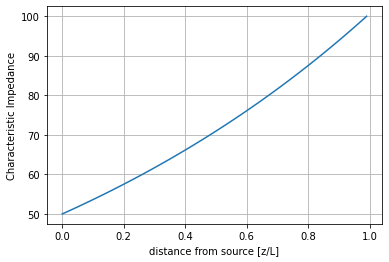

In [ ]:
h = np.ones(n)
int_h = np.zeros(n)
#integrate h by summing the values of h from 0 to n
for ii in range(1,n):
    int_h[ii] = int_h[ii-1]+h[ii]
# plt.plot(np.exp(2*int_h))
#g = exp(integral(h))
g = np.exp(2*int_h)
k2 = g[0]
k1 = np.log(g[n-1]/k2)/np.log(zl/zo)
Z_line = zo*(g/k2)**(1/k1)
z = np.array(range(n))/100
plt.plot(z,Z_line)
plt.xlabel('distance from source [z/L]')
plt.ylabel('Characteristic Impedance')
plt.grid()
plt.show()
import pandas as pd
df = pd.DataFrame(Z_line)
df.to_csv('Z_line_exp.csv')


# Compute Reflection Coefficient for Exponential Taper

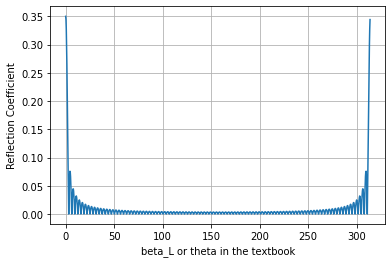

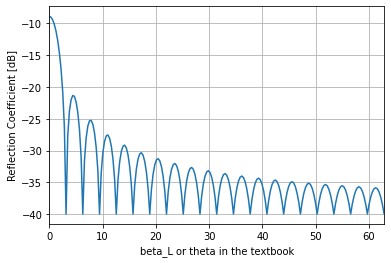

In [ ]:
#Let divide L into 100 pieces then use fft to find reflection coefficent.
#Let h(z) = 1
#Exponential Taper: h(z) = 1/k1 
h = np.ones(n)/k1
#zero padding 10 เท่าเพื่อให้เห็น รายละเอียดของ ripple 
H = np.fft.fft(h,10*n)

#fs = 100, df = 100/1000 = 0.1, d_omega = 2 pi df = 2 pi * 0.1, omega = 2 beta, d_beta = d_omega/2 = 0.1 pi
fs = n
df = fs/(10*n)
#2 \beta = \omega
d_omega = 2*np.pi*df
d_beta = d_omega/2
beta_L = d_beta*np.array(range(10*n))

plt.plot(beta_L,np.abs(H))
plt.xlabel('beta_L or theta in the textbook')
plt.ylabel('Reflection Coefficient')
plt.grid()
plt.show()

plt.plot(beta_L,20*np.log10(np.abs(H)+1e-2))
plt.xlim(0,20*np.pi)
plt.xlabel('beta_L or theta in the textbook')
plt.ylabel('Reflection Coefficient [dB]')
plt.grid()
plt.show()


https://flothesof.github.io/FFT-window-properties-frequency-analysis.html?fbclid=IwAR0Z8H8XXi4qnT4H-N47oSronBXWdn7WDmD4zL4DfUfdxXv_w-2BuSben54  

BOXCAR has the first zero at $$ \pi$$ or $$\beta L =  \pi$$ or $$L = 0.5 \lambda$$ or $$L = 180^o$$.  
There are n sections. Each section has length of 180/n degrees. 

# TRY Blackman Harris window for h(z)

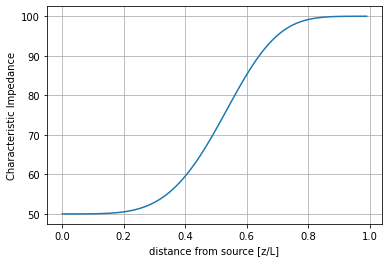

In [ ]:
from scipy.signal import get_window
h = get_window('blackmanharris', n)
int_h = np.zeros(n)
#integrate h by summing the values of h from 0 to n
for ii in range(1,n):
    int_h[ii] = int_h[ii-1]+h[ii]
# plt.plot(np.exp(2*int_h))
#g = exp(integral(h))
g = np.exp(2*int_h)
k2 = g[0]
k1 = np.log(g[n-1]/k2)/np.log(zl/zo)
Z_line = zo*(g/k2)**(1/k1)
z = np.array(range(n))/100
plt.plot(z,Z_line)
plt.xlabel('distance from source [z/L]')
plt.ylabel('Characteristic Impedance')
plt.grid()
plt.show()
import pandas as pd
df = pd.DataFrame(Z_line)
df.to_csv('Z_line_blackman.csv')



# Compute Reflection Coefficient for Blackman Herris

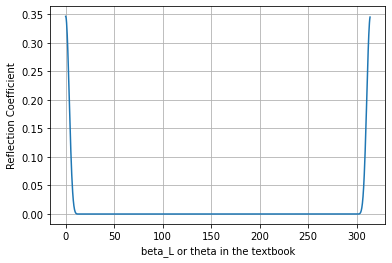

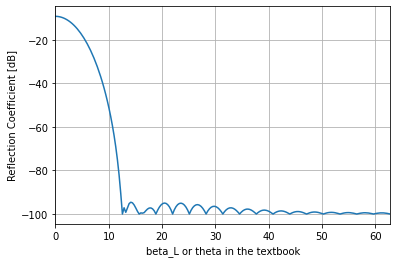

In [ ]:
#Let divide L into 100 pieces then use fft to find reflection coefficent.
#Let h(z) = 1
#'blackmanharris' 
h = get_window('blackmanharris', n)/k1
#zero padding 10 เท่าเพื่อให้เห็น รายละเอียดของ ripple 
H = np.fft.fft(h,10*n)

fs = n
df = fs/(10*n)
#2 \beta = \omega
d_omega = 2*np.pi*df
d_beta = d_omega/2
beta_L = d_beta*np.array(range(10*n))

plt.plot(beta_L,np.abs(H))
plt.xlabel('beta_L or theta in the textbook')
plt.ylabel('Reflection Coefficient')
plt.grid()
plt.show()

plt.plot(beta_L,20*np.log10(np.abs(H)+1e-5))
plt.xlim(0,20*np.pi)
plt.xlabel('beta_L or theta in the textbook')
plt.ylabel('Reflection Coefficient [dB]')
plt.grid()
plt.show()


https://flothesof.github.io/FFT-window-properties-frequency-analysis.html?fbclid=IwAR0Z8H8XXi4qnT4H-N47oSronBXWdn7WDmD4zL4DfUfdxXv_w-2BuSben54  

Blackmanharris has the first zero at $$4 \pi$$ or $$\beta L = 4 \pi$$ or $$L = 2 \lambda$$ or $$L = 720^o$$.  
There are n sections. Each section has length of 720/n degrees.